In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5

mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

### KNN: часть 1

Сгенерируем случайную выборку и попробуем пронаблюдать, как при разных значениях `K` будут меняться результаты модели, основанной на ближайших соседях!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 500

In [4]:
X = np.random.uniform(low=0, high=20, size=(500, 1))

def target(x):  
    return x + 3 * np.sin(2*x)


noise = np.random.normal(loc=0, scale=1, size=(500,1))

Y = target(X) + noise

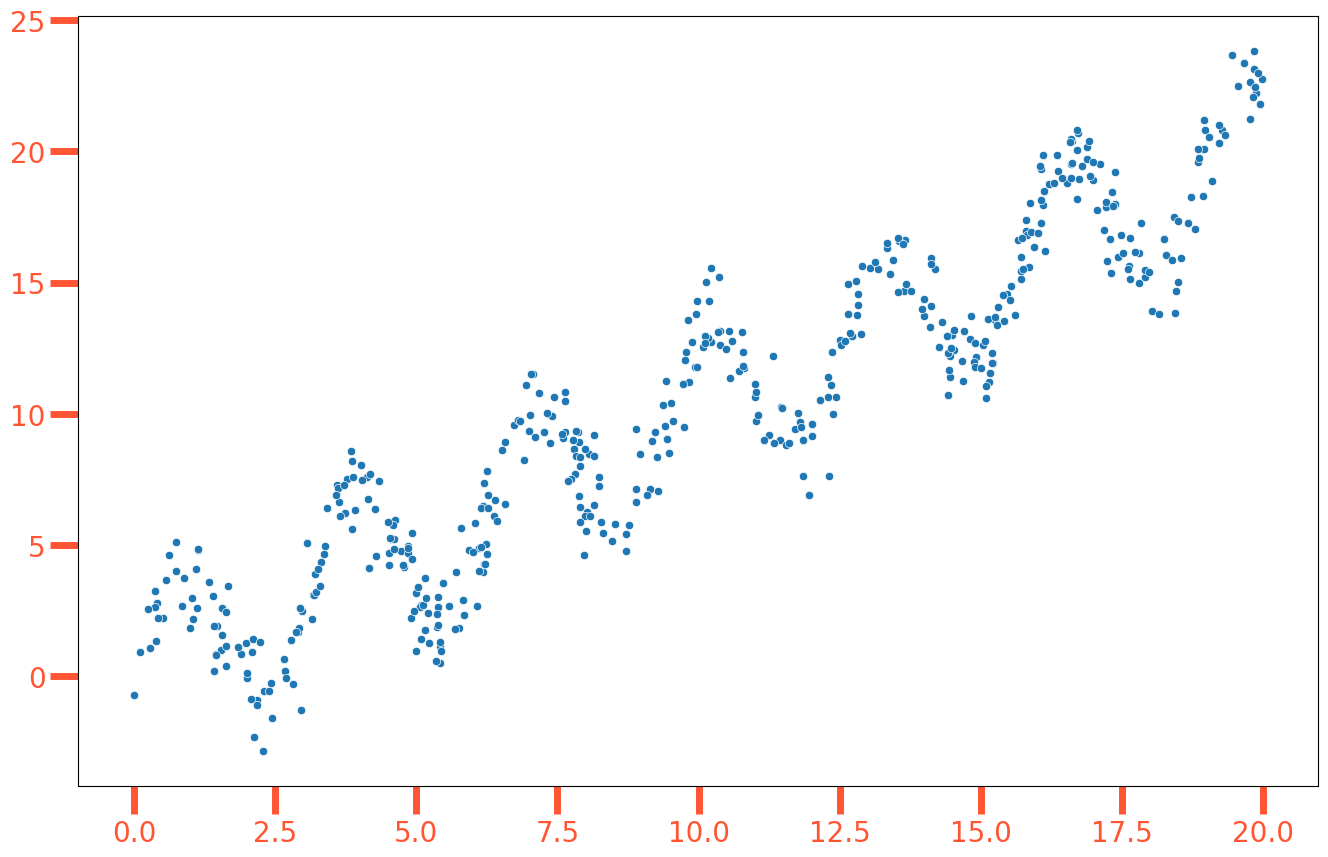

In [22]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.scatterplot(x=X.ravel(), y=Y.ravel())

plt.show()

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

splitter = KFold(n_splits=5, shuffle=True, random_state=33)

linear = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3) 

linear_cv = cross_validate(linear, X, Y, 
                           cv=splitter, scoring='neg_mean_squared_error',
                           return_train_score=True)

knn_cv = cross_validate(knn, X, Y, 
                        cv=splitter, scoring='neg_mean_squared_error',
                        return_train_score=True)

In [7]:
print(f"Среднее MSE линейной модели на трейне: {-np.mean(linear_cv['train_score']).round(3)}")
print(f"Среднее MSE линейной модели на тесте: {-np.mean(linear_cv['test_score']).round(3)}")

print(f"\nСреднее MSE KNN модели на трейне: {-np.mean(knn_cv['train_score']).round(3)}")
print(f"Среднее MSE KNN модели на тесте: {-np.mean(knn_cv['test_score']).round(3)}")

Среднее MSE линейной модели на трейне: 5.39
Среднее MSE линейной модели на тесте: 5.434

Среднее MSE KNN модели на трейне: 0.745
Среднее MSE KNN модели на тесте: 1.496


In [8]:
### Обучим модель на всей выборке

linear.fit(X, Y)
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=3)

In [9]:
### Пришли новые данные!

new_X = np.random.uniform(low=20, high=30, size=(50, 1))

new_noise = np.random.normal(loc=0, scale=1, size=(50, 1))

new_Y = target(new_X) + new_noise

knn_preds = knn.predict(new_X)
linear_preds = linear.predict(new_X)

In [10]:
print(f"MSE KNN модели на новых данных: {np.mean((knn_preds-new_Y)**2).round(3)}")
print(f"MSE линейной модели новых данных: {np.mean((linear_preds-new_Y)**2).round(3)}")

MSE KNN модели на новых данных: 21.672
MSE линейной модели новых данных: 5.839


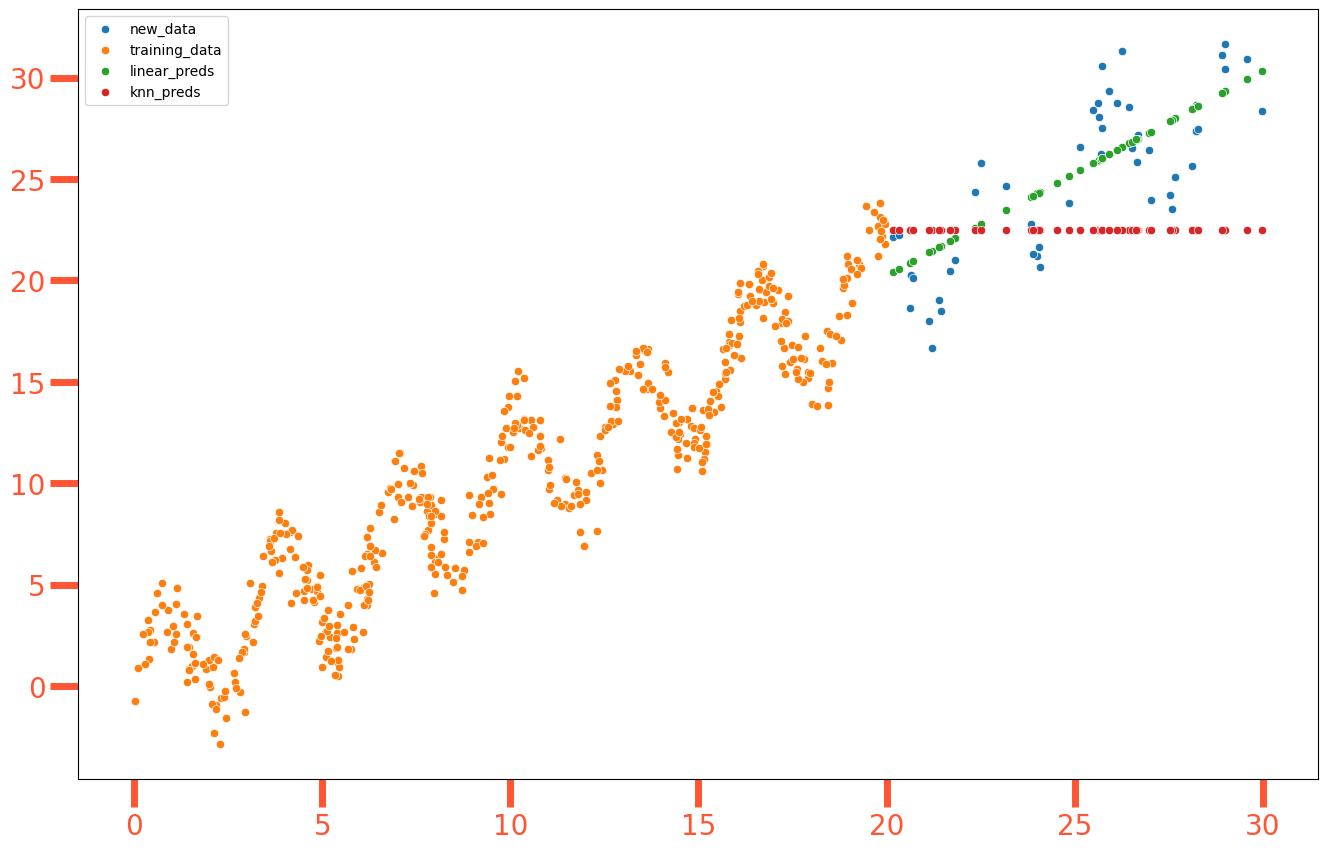

In [23]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.scatterplot(x=new_X.ravel(), y=new_Y.ravel())
sns.scatterplot(x=X.ravel(), y=Y.ravel())
sns.scatterplot(x=new_X.ravel(), y=linear_preds.ravel())
sns.scatterplot(x=new_X.ravel(), y=knn_preds.ravel())


plt.legend(["new_data", "training_data", "linear_preds", "knn_preds"])

plt.show()

### KNN: подбор числа K

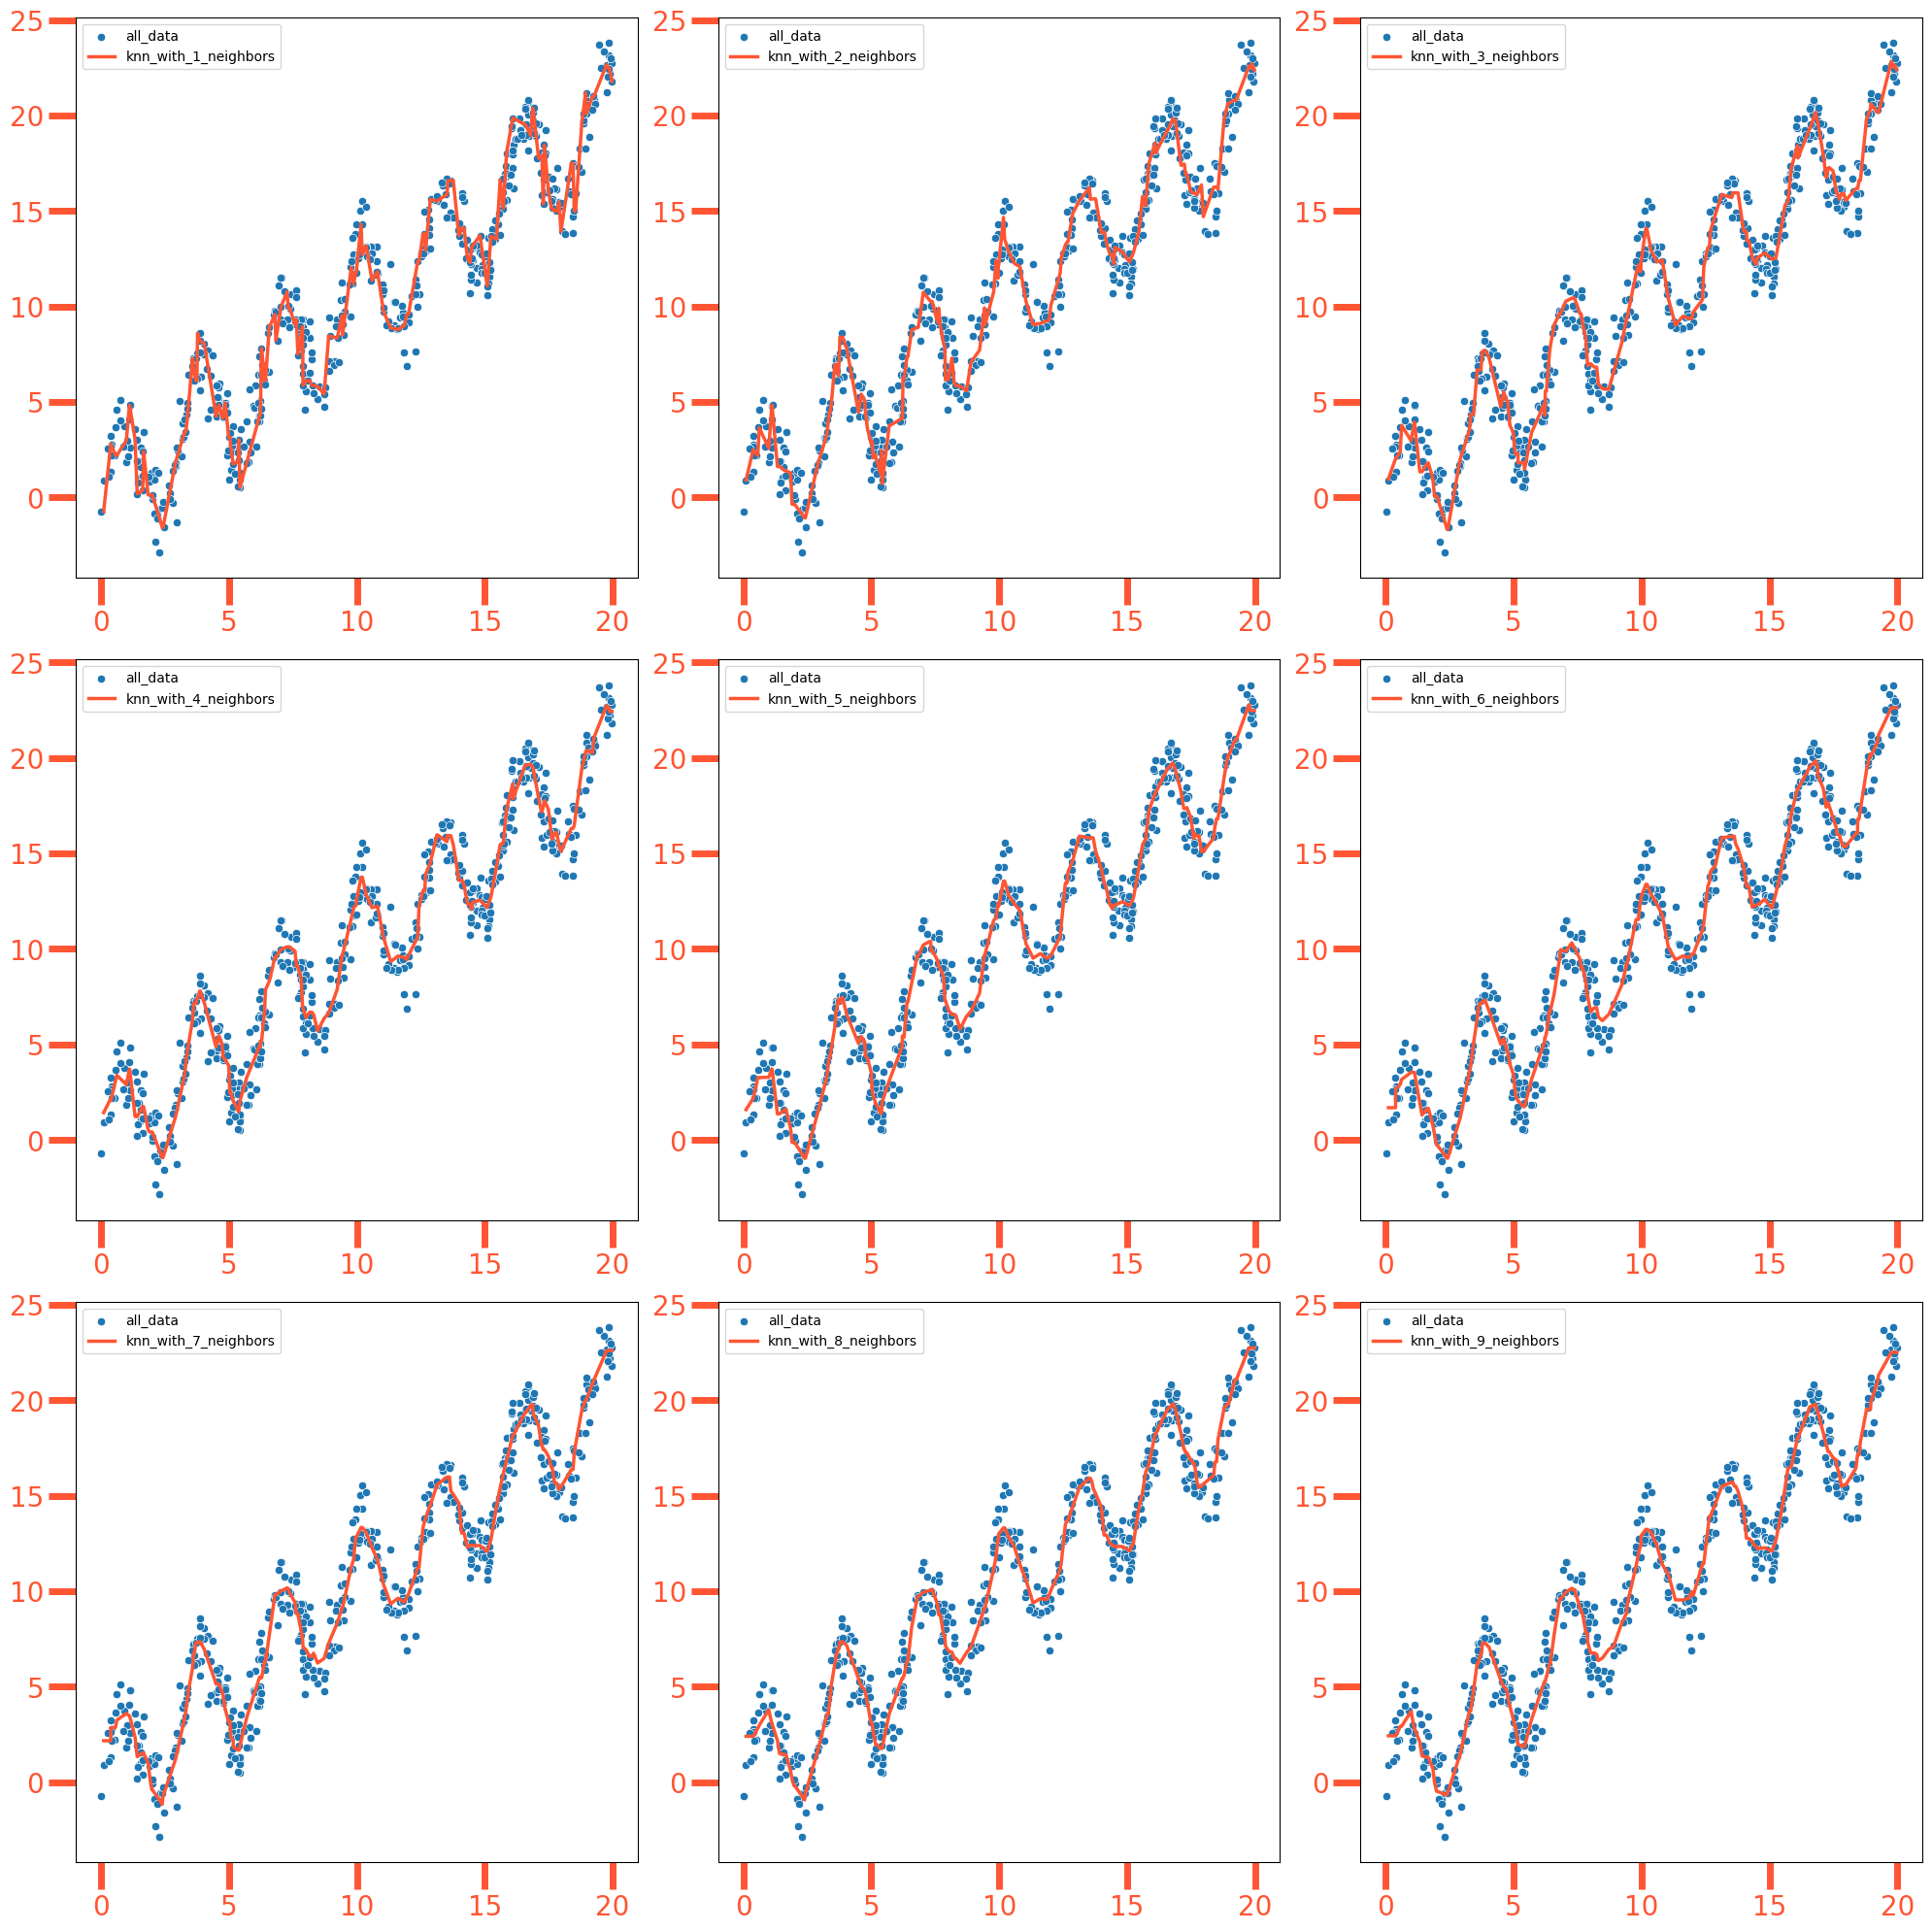

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.33, 
                                                    random_state=33)

fig = plt.figure()
fig.set_size_inches(20, 20)

for K in range(1, 10):

    knn = KNeighborsRegressor(n_neighbors=K) 
    knn.fit(X_train, y_train)
    
    preds_test = knn.predict(X_test)
    
    ax = fig.add_subplot(3, 3, K)
    
    sns.scatterplot(x=X.ravel(), y=Y.ravel())
    sns.lineplot(x=X_test.ravel(), y=preds_test.ravel(), size=3, color='#FF5533')
    plt.legend(["all_data", f"knn_with_{K}_neighbors"])

fig.tight_layout()

plt.show()

Совсем большие K тоже плохо, ведь чем оно больше, тем прогноз больше похож просто на среднее по трейну.

In [26]:
X_train.shape

(335, 1)

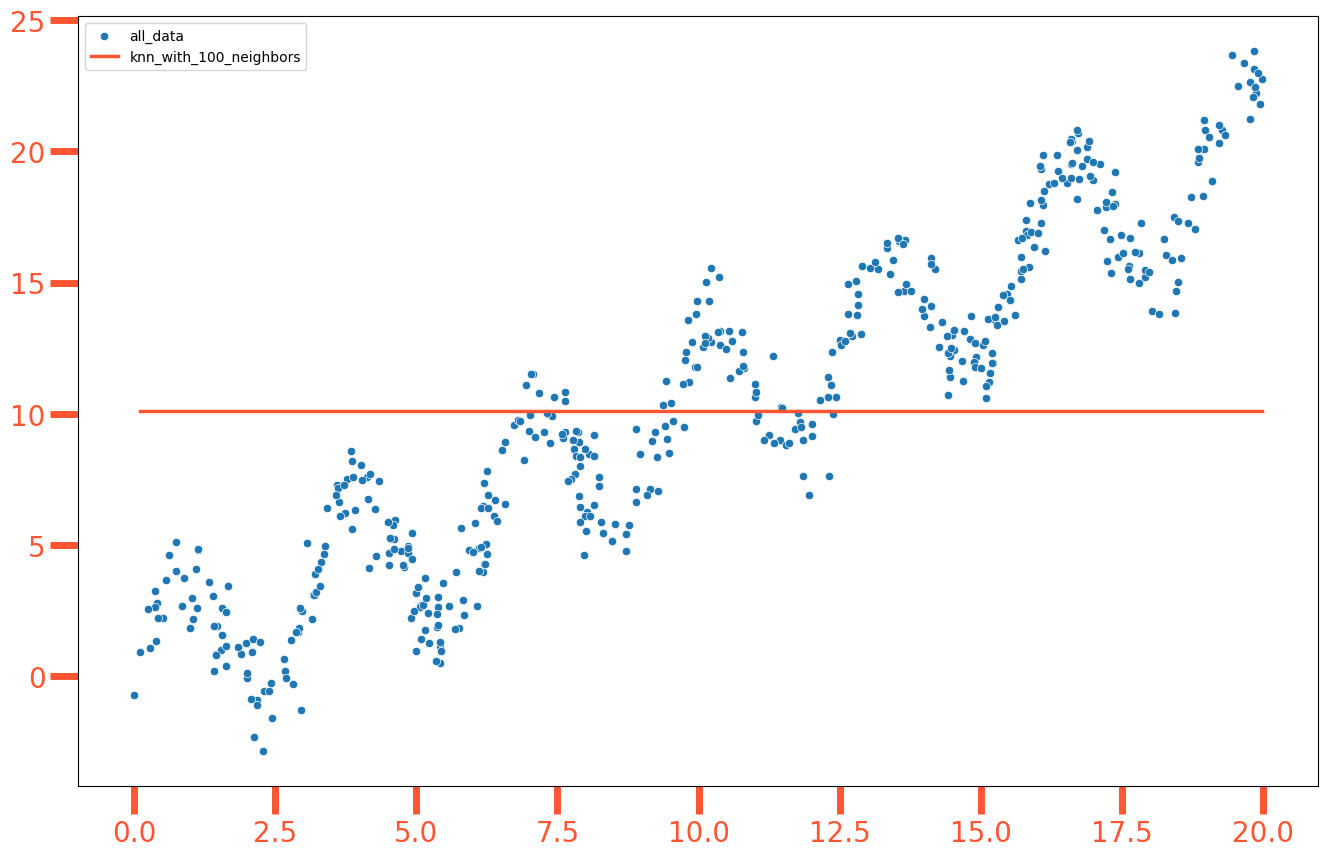

In [27]:
knn = KNeighborsRegressor(n_neighbors=335)

fig = plt.figure()
fig.set_size_inches(16, 10)

knn.fit(X_train, y_train)
    
preds_test = knn.predict(X_test)

sns.scatterplot(x=X.ravel(), y=Y.ravel())
sns.lineplot(x=X_test.ravel(), y=preds_test.ravel(), size=3, color='#FF5533')
plt.legend(["all_data", f"knn_with_100_neighbors"])

plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

search = GridSearchCV(knn, param_grid, cv=splitter)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.96533):
{'n_neighbors': 7}


Ширина Гауссовского ядра

$$
w_i = \frac{1}{\sqrt{2\cdot\pi}} \cdot exp(-\frac{1}{2}\cdot \frac{\rho^2 (x, x_i)}{h^2})
$$

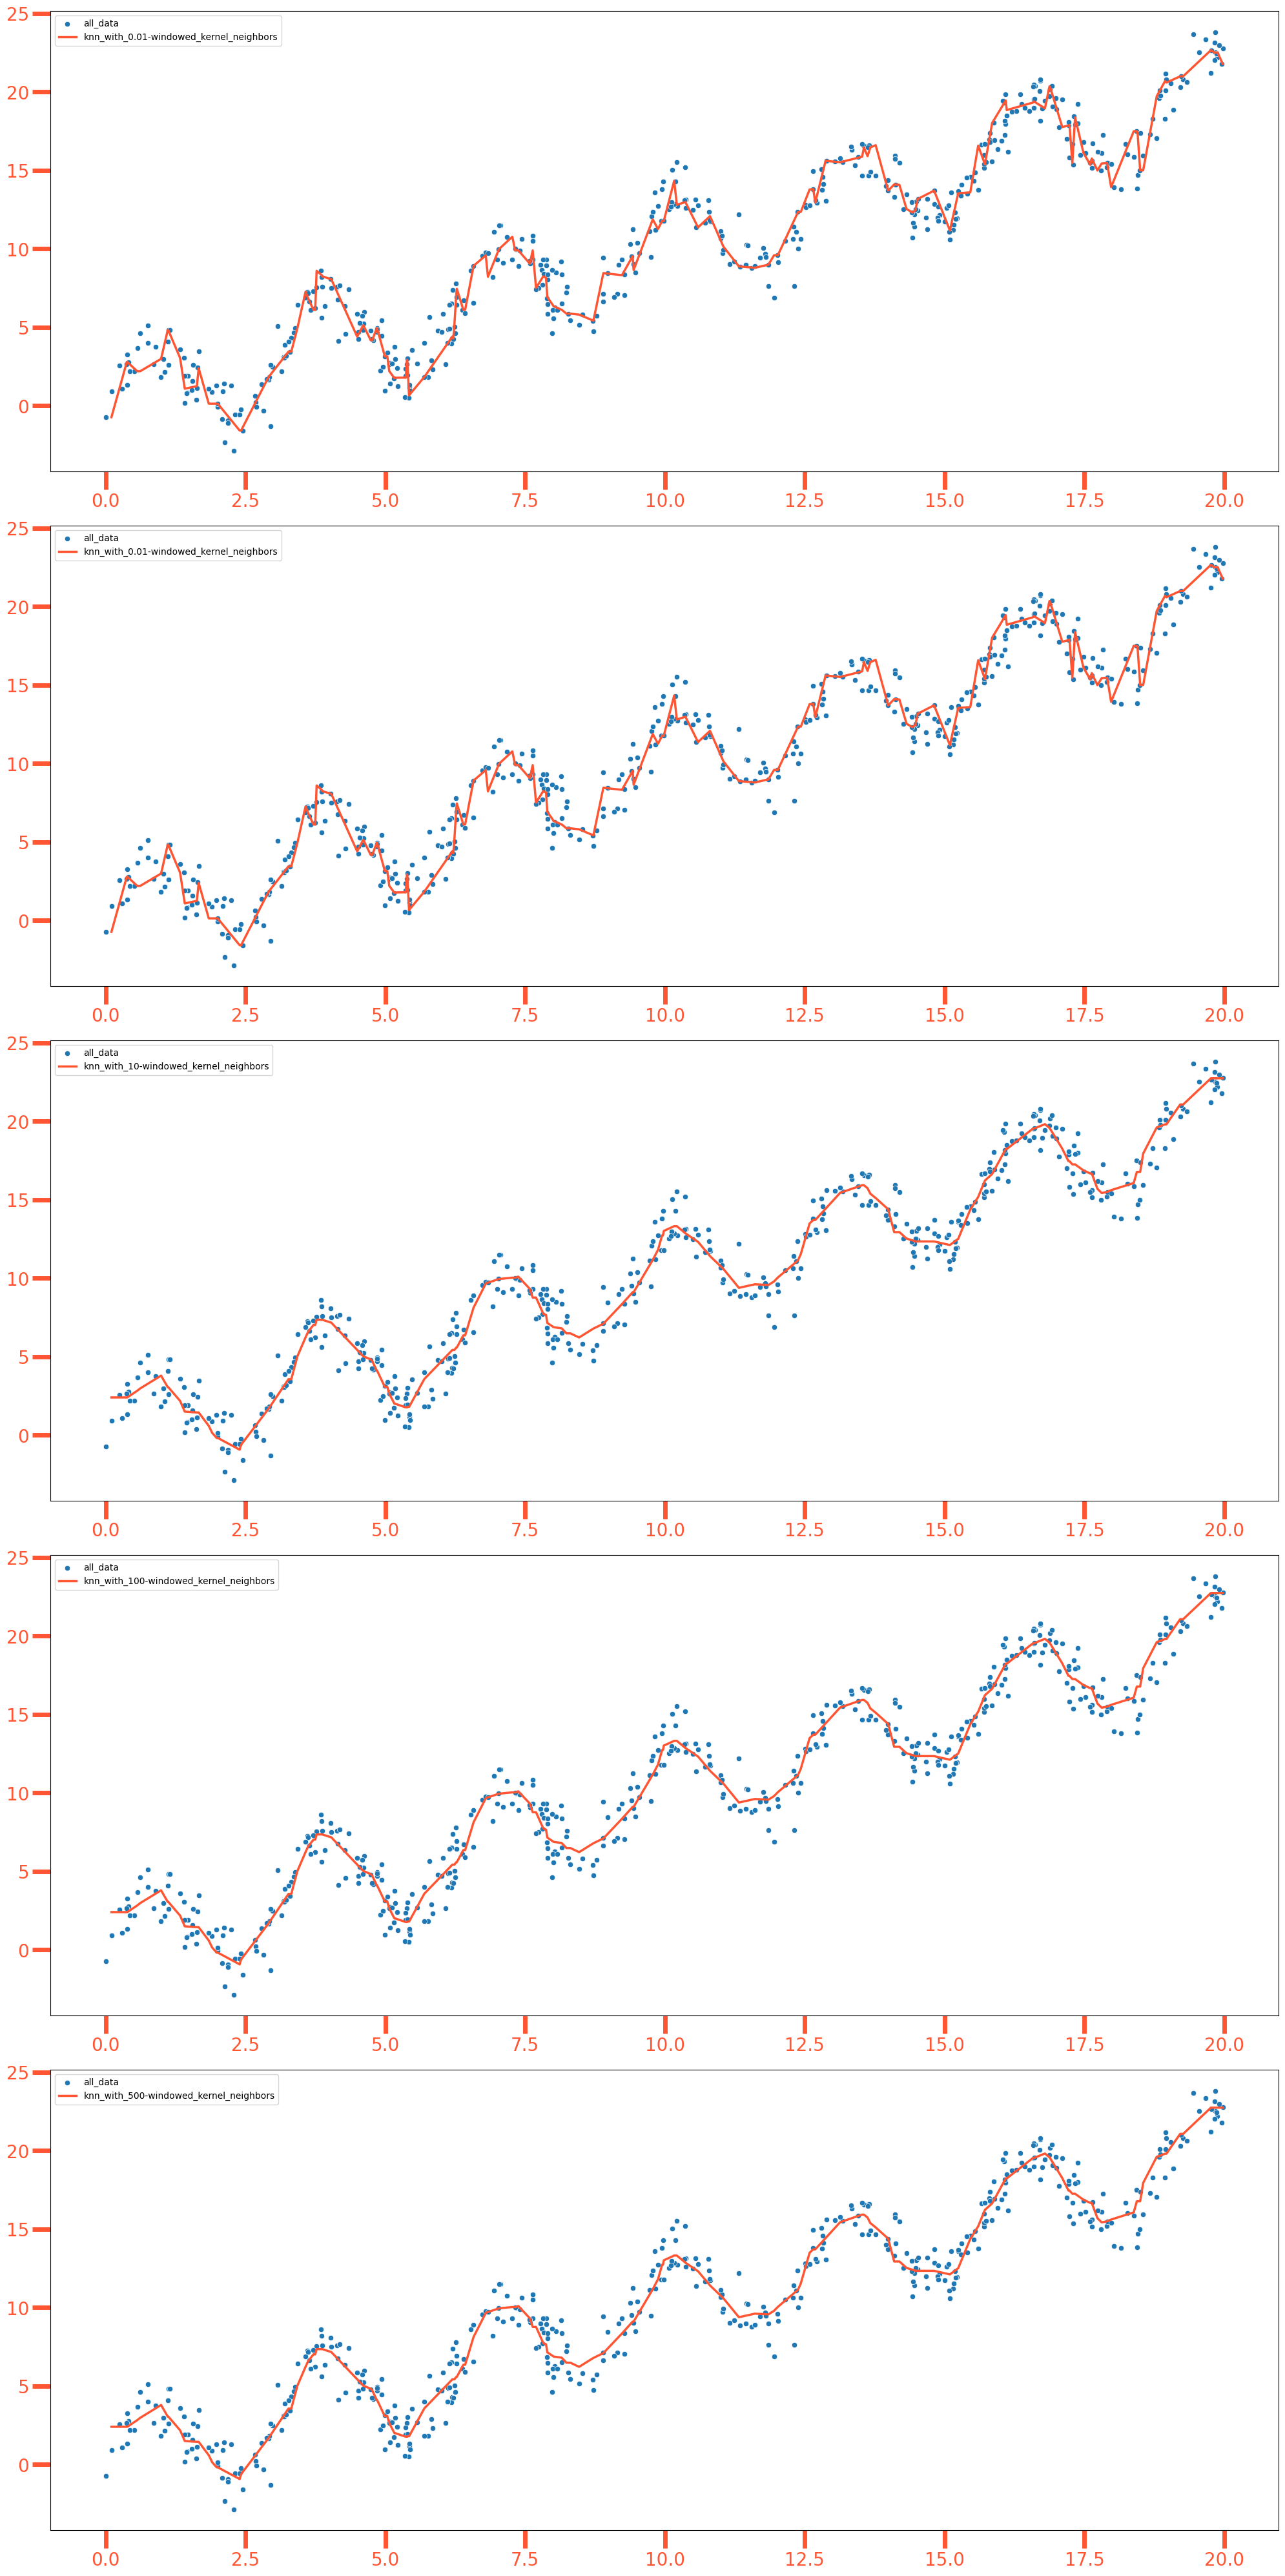

In [30]:
from sklearn.neighbors import KernelDensity

fig = plt.figure()
fig.set_size_inches(20, 40)

k=1

for h in [0.01, 0.01, 10, 100, 500]:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn = KNeighborsRegressor(n_neighbors=8, weights=kernel)
    knn.fit(X_train, y_train)
    
    preds_test = knn.predict(X_test)
    
    ax = fig.add_subplot(5, 1, k)
    
    k += 1
    
    sns.scatterplot(x=X.ravel(), y=Y.ravel())
    sns.lineplot(x=X_test.ravel(), y=preds_test.ravel(), size=3, color='#FF5533')
    plt.legend(["all_data", f"knn_with_{h}-windowed_kernel_neighbors"])

fig.tight_layout()


### KNN: сегментация клиентов

In [31]:
data = pd.read_excel('processed_segmentation.xlsx')

data.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
0,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
1,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
2,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
3,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
4,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [32]:
X = data.drop("Segmentation", axis=1)
Y = data["Segmentation"]

One vs Rest без подбора гиперпараметров:
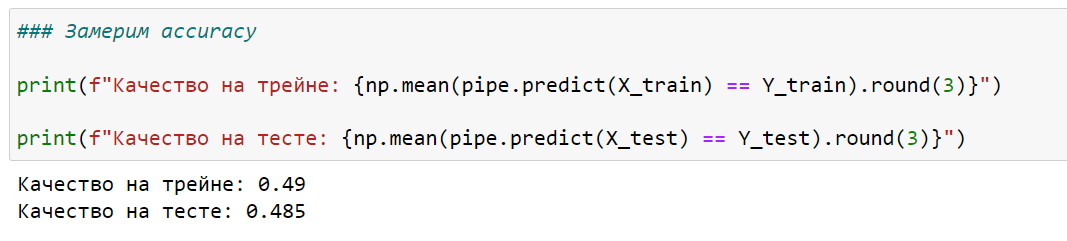


In [33]:
def kernel(distances, h=1):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state=0,
                                                    test_size=0.2)

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(weights=kernel))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(weights=<function kernel at 0x12c374d30>))])

In [35]:
### Замерим accuracy

print(f"Качество на трейне: {np.mean(pipe.predict(X_train) == Y_train).round(3)}")

print(f"Качество на тесте: {np.mean(pipe.predict(X_test) == Y_test).round(3)}")

Качество на трейне: 0.741
Качество на тесте: 0.488


In [36]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('KNN', KNeighborsClassifier(weights=<function kernel at 0x12c374d30>))],
 'verbose': False,
 'scaler': StandardScaler(),
 'KNN': KNeighborsClassifier(weights=<function kernel at 0x12c374d30>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 5,
 'KNN__p': 2,
 'KNN__weights': <function __main__.kernel(distances, h=1)>}

In [37]:
np.linspace(1, 5, 5, dtype=int)

array([1, 2, 3, 4, 5])

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'KNN__n_neighbors': np.linspace(1, 100, 10, dtype=int),
    'KNN__p': np.linspace(1, 5, 5, dtype=int),
    'KNN__weights': ['uniform', 'distance', kernel]
}

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.50062):
{'KNN__n_neighbors': 67, 'KNN__p': 1, 'KNN__weights': 'distance'}
